In [2]:
# imports and setup 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd
import os

data = pd.read_csv('../logs/cheesemaze-jarryd-linux-1.csv',sep=', ',engine='python')
print data.tail()

       global_cycle  cycle  observation  reward  action  explore_on  explored  \
19997         19997      2            8       9       2           1         0   
19998         19998      3            5       9       2           1         0   
19999         19999      1           10      10       1           1         0   
20000         20000      2            8       9       2           0         0   
20001         20001      3            5       9       2           0         0   

       explore_rate_g  total reward  average reward  end of game  game_end  
19997        0.039866        257851         10.4596            0         0  
19998        0.039857        257860         10.4596            1         0  
19999        0.039848        257890         10.4599            0         0  
20000        0.039839        257899         10.4599            0         0  
20001        0.039839        257908         10.4598            1         0  


In [12]:
for file in os.listdir("../logs/"):
    if file.endswith(".csv"):
        print("../logs/"+file)

../logs/cheesemaze-2.csv
../logs/cheesemaze-jar-5.csv
../logs/cheesemaze-jarryd-linux-1.csv
../logs/cheesemaze-ryk-converge-20k.csv
../logs/cheesemaze-ryk-no-prune.csv
../logs/cheesemaze-yadu-1.csv
../logs/cheesemaze-yadu-2.csv
../logs/rockpaper-1.csv
../logs/rockpaper-2.csv
../logs/rockpaper-3-cheng.csv
../logs/rockpaper-3.csv
../logs/rockpaper-jarryd-6.csv
../logs/rockpaper-jarryd-low-exp-okay.csv
../logs/rockpaper-yadu-1.csv
../logs/tictactoe-1.csv
../logs/tictactoe-jarryd-2.csv
../logs/tictactoe-rao-4.csv
../logs/tictactoe-ryk-3.csv
../logs/tictactoe-ryk-4.csv
../logs/tictactoe-ryk.csv
../logs/tiger-4-cheng.csv
../logs/tiger-5-ryk.csv
../logs/tiger-jarryd-2.csv
../logs/tiger-john-1.csv


In [3]:
df = np.array(data[['cycle','reward','explore_on']])

dat = []
ave = [0]
reward_offset=10
jdx = 0
for idx in xrange(1,len(df)):
    if df[idx,2]==1:
        continue
    
    if df[idx,2] == -1 and df[idx-1,2] == 1:
        continue
    df[idx,1]-=reward_offset
    dat.append(df[idx,1])
    jdx += 1

    ave.append(ave[jdx-1]*float(jdx-1)/jdx + (1.0/jdx) * df[idx,1])
dat = np.array(dat)
ave = np.array(ave)

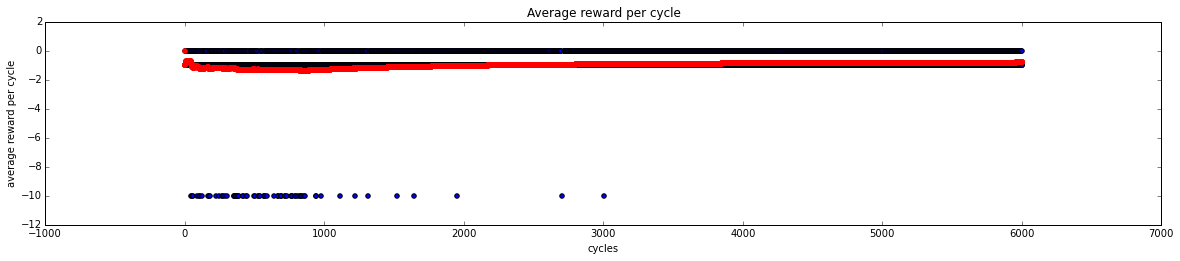

In [4]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(211)
ax.set_title('Average reward per cycle')
ax.set_xlabel('cycles')
ax.set_ylabel('average reward per cycle')
ax.scatter(np.arange(len(dat)),dat)
ax.scatter(np.arange(len(ave)),ave,color='red')

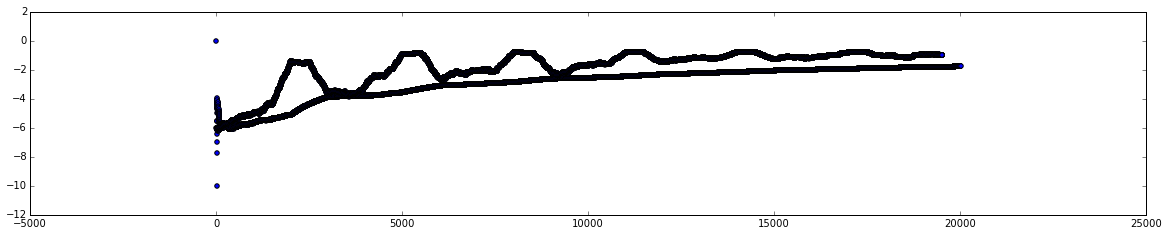

In [5]:
dat=np.array(data[['reward']])
# compute running average
dat-=reward_offset
cs = np.cumsum(dat).astype(float)
for i in xrange(1,len(dat)):
    cs[i]/=i

# compute rolling average reward/cycle
dicks = []
window_size = 500
tmp = np.sum(dat[0:window_size])/window_size
for i in xrange(window_size,len(dat)):
    tmp += float(dat[i])/window_size
    tmp -= float(dat[i-window_size])/window_size
    dicks.append(tmp)
dicks = np.array(dicks)

# plots
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(211)
ax.scatter(np.arange(len(dat)),cs)
ax.scatter(np.arange(len(dat)-window_size),dicks)